X = 0:
t >    |       x >           |    v (m/s)>      |    v (km/h)>
97.263 -0.000795097924858745 -5.000000000000113 -18.00000000000041



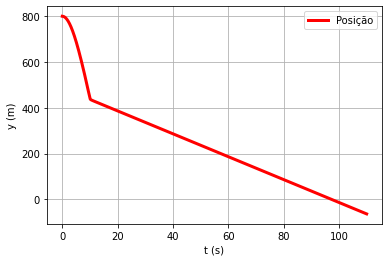

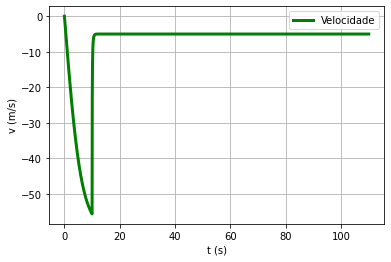

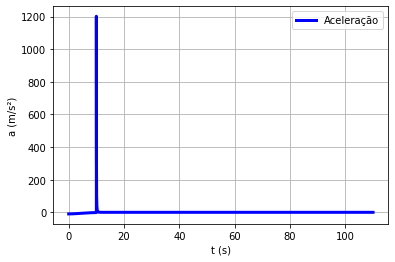

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 110

# Posição e velocidade inicial
x0 = 800
v0 = 0

# Velocidade terminal (paraquedas fechado)
vt = 60

# Aceleração
D = g / (vt * np.abs(vt))


# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que não falta o ultimo dado)
t = np.linspace(ti, tf, n + 1)


# Vetor aceleração, velocidade, posição
a = np.empty(n + 1)
v = np.empty(n + 1)
x = np.empty(n + 1)

# Introduzir v0 e x0 nos respetivos vetores
v[0] = v0
x[0] = x0

# Preencher os vetores a, v e x
for i in range(n):
    # Quando t ~ 0, v terminal = 5 m/s e recalcular D
    if(t[i] > 10 - dt and t[i] < 10 + dt):
        vt = 5
        D = g / (vt * np.abs(vt))
    a[i] = - D * v[i] * np.abs(v[i]) - g
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    
    
# Para que o plot da aceleração seja legivel
a[-1] = a[-2]
    
    
# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (x[i] > (0 - dt) and x[i + 1] < (0 + dt)):
        print("X = 0:")
        print("t >    |       x >           |    v (m/s)>      |    v (km/h)>")
        print(t[i + 1], x[i + 1], v[i + 1], v[i + 1] * 3600 / 1000)
        print("")
        break

   
    
    
# Plots
plt.plot(t, x, label="Posição",  linestyle='-', linewidth=3, color="red")
plt.ylabel("y (m)")
plt.xlabel("t (s)")
plt.legend()
plt.grid()
plt.show()

plt.plot(t, v, label="Velocidade",  linestyle='-', linewidth=3, color="green")
plt.ylabel("v (m/s)")
plt.xlabel("t (s)")
plt.legend()
plt.grid()
plt.show()

plt.plot(t, a, label="Aceleração",  linestyle='-', linewidth=3, color="blue")
plt.ylabel("a (m/s²)")
plt.xlabel("t (s)")
plt.legend()
plt.grid()
plt.show()
